In [1]:
!pwd

/aiffel/aiffel/day3_CreditCardDetection


In [2]:
import sys

In [3]:
sys.path.append('./src')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cc_df = pd.read_csv('/aiffel/data/fraud.csv')

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
# 데이터 살펴보기. is_fraud: 사기거래 여부를 나타내는 변수
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [8]:
cc_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**변수 내용 확인 (검색 엔진 활용)**

|변수명|내용|
|------|---|
| trans_date_trans_time | 거래 발생 일시 |
| cc_num | 신용카드 번호 |
| merchant | 가맹점 이름 |
| category | 거래 카테고리 |
| amt | 거래 금액 |
| first | 카드 소지자의 이름(이름) |
| last | 카드 소지자의 이름(성) |
| gender | 성별 |
| street | 주소(도로명) |
| city | 도시명 |
| state | 주/지역명 |
| zip | 우편번호 |
| lat | 위도 (주소 기반) |
| long | 경도 (주소 기반) |
| city_pop | 도시 인구 |
| job | 직업 |
| dob | 생년월일 |
| trans_num | 거래 고유 번호 |
| unix_time | 거래 시간(Unix 타임스탬프) |
| merch_lat | 가맹점 위도 |
| merch_long | 가맹점 경도 |
| is_fraud | 거래가 사기인지 여부 (0: 정상, 1: 사기) |

In [9]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [10]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


# 1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거

In [11]:
# 정보 없는 컬럼 확인
cc_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
# cc_df['merchant'].nunique()
# cc_df['job'].nunique()
# cc_df['cc_num'].nunique()

In [13]:
# 컬럼 별 고유값들의 수 확인
for col in cc_df.columns:
    print(col, cc_df[col].nunique())

trans_date_trans_time 488474
cc_num 124
merchant 693
category 14
amt 36446
first 92
last 102
gender 2
street 124
city 121
state 44
zip 124
lat 124
long 124
city_pop 122
job 110
dob 123
trans_num 491134
unix_time 488477
merch_lat 484503
merch_long 487445
is_fraud 2


In [14]:
# 컬럼 별 value count 확인
for col in cc_df.columns:
    print(col, cc_df[col].value_counts())

trans_date_trans_time 2019-10-17 23:20:54    3
2019-12-26 17:21:34    3
2019-12-02 13:41:29    3
2020-11-16 13:51:37    3
2019-12-09 17:30:34    3
                      ..
2019-09-20 22:59:53    1
2019-09-20 22:53:19    1
2019-09-20 22:52:14    1
2019-09-20 22:50:44    1
2020-12-31 23:59:34    1
Name: trans_date_trans_time, Length: 488474, dtype: int64
cc_num 6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64
merchant fraud_Kilback LLC                      1602
fraud_Cormier LLC                      1455
fraud_Kuhn LLC                         1446
fraud_Schumm PLC                       1392
fraud_Boyer PLC                        1375
                                       ... 
fraud_Little-Gleichner                  228
fraud_

In [15]:
cc_df[['merchant','first','last','street','city','state','zip','job','trans_num','unix_time']].head()

,merchant,first,last,street,city,state,zip,job,trans_num,unix_time
0,"fraud_Heller, Gutmann and Zieme",Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044
1,"fraud_Schultz, Simonis and Little",Kenneth,Robinson,269 Sanchez Rapids,Elizabeth,NJ,7208,Operational researcher,09eff9c806365e2a6be12c1bbab3d70e,1325376754
2,fraud_Kling-Grant,Mary,Wall,2481 Mills Lock,Plainfield,NJ,7060,Leisure centre manager,19e23c6a300c774354417befe4f31f8c,1325377036
3,fraud_Deckow-O'Conner,Daniel,Escobar,61390 Hayes Port,Romulus,MI,48174,Police officer,6f363661ba6b55889e488dd178f2a0af,1325377215
4,fraud_Balistreri-Nader,Jenna,Brooks,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,"Designer, furniture",1654da2abfb9e79a5f99167fc9779558,1325377421


In [16]:
def drop_func(data):
    data.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis = 1, inplace= True)
    return data

In [17]:
cc_df = drop_func(cc_df)

In [18]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0


In [19]:
# 숫자 변수 선택
numeric_cols = cc_df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

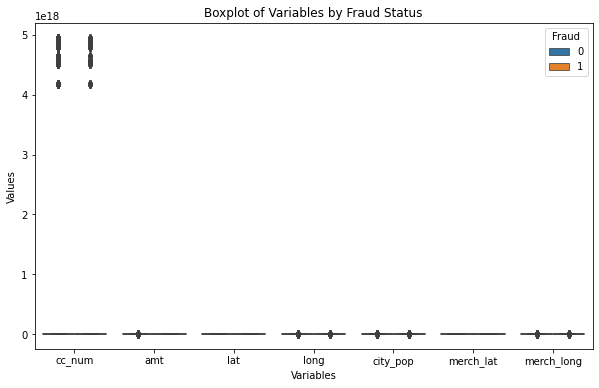

In [20]:
# # 긴 형식으로 변환
# df_melted = cc_df.melt(id_vars='is_fraud', value_vars=['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long'],
#                      var_name='Variable', value_name='Value')

# numeric한 변수를 긴 형식으로 변환
df_melted = cc_df.melt(id_vars='is_fraud', value_vars=numeric_cols,
                     var_name='Variable', value_name='Value')


# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', hue='is_fraud', data=df_melted)

# 그래프 제목과 레이블 설정
plt.title('Boxplot of Variables by Fraud Status')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.legend(title='Fraud', loc='upper right')

# 그래프 보여주기
plt.show()


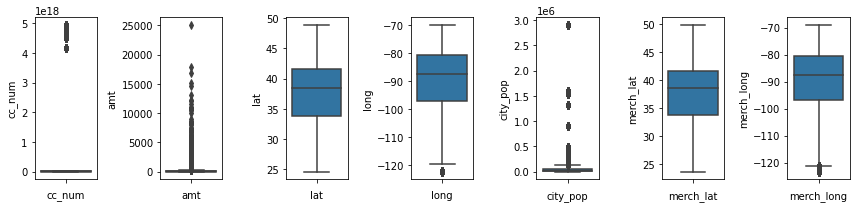

In [21]:
# 박스 플롯을 그릴 변수 목록
variables = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# 각 변수에 대한 박스 플롯 그리기
plt.figure(figsize=(12, 3))

for i, variable in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)  # 1행, 변수 개수만큼 열
    sns.boxplot(y=cc_df[variable])  # y축에 변수 값 설정
    #plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

# 그래프 보여주기
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [22]:
cc_df.sort_values('cc_num')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
378075,2020-08-05 17:03:19,503874407318,shopping_pos,7.77,M,29.5894,-98.5201,1595797,1975-12-28,30.014539,-98.426767,0
230588,2019-12-20 22:21:36,503874407318,health_fitness,72.06,M,29.5894,-98.5201,1595797,1975-12-28,29.260487,-97.961746,0
421413,2020-10-10 12:39:32,503874407318,misc_pos,4.78,M,29.5894,-98.5201,1595797,1975-12-28,29.116928,-99.258936,0
468378,2020-12-13 15:55:44,503874407318,kids_pets,84.56,M,29.5894,-98.5201,1595797,1975-12-28,29.994537,-98.441297,0
345085,2020-06-22 23:52:06,503874407318,entertainment,24.33,M,29.5894,-98.5201,1595797,1975-12-28,29.277168,-98.239289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53631,2019-04-14 16:57:31,4956828990005111019,entertainment,27.41,M,40.6747,-74.2239,124967,1980-12-21,39.888460,-74.151440,0
485223,2020-12-27 14:14:40,4956828990005111019,home,28.52,M,40.6747,-74.2239,124967,1980-12-21,41.068207,-75.015316,0
264968,2020-02-15 13:32:48,4956828990005111019,shopping_pos,2.95,M,40.6747,-74.2239,124967,1980-12-21,41.435438,-73.839008,0
63475,2019-04-30 17:45:09,4956828990005111019,shopping_pos,7.28,M,40.6747,-74.2239,124967,1980-12-21,41.149072,-75.143152,0


# 2. 최소 2개 이상의 새로운 피처(변수)를 생성

## (1) 구매 금액 변수 이용 (amt)

In [23]:
# cc_num 그룹에 따른 amt 정보
amt_info = cc_df.groupby('cc_num')['amt'].agg(['mean','std']).reset_index()

In [24]:
amt_info.to_pickle('./src/amt_info.pkl')

In [25]:
# cc_df에 amt_info를 merge
cc_df = cc_df.merge(amt_info, on = 'cc_num', how = 'left')
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881


Z-score를 이용하여 극단적인 이상 거래를 탐지

In [26]:
# amt_z스코어 구하기
cc_df['amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881,-0.393828


In [27]:
cc_df[cc_df['is_fraud'] == 1]

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,M,41.5205,-80.0573,5507,1973-07-28,41.947427,-79.796264,1,58.578675,149.804992,-0.312731
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,5507,1973-07-28,42.148618,-79.398595,1,58.578675,149.804992,1.803020
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,M,41.5205,-80.0573,5507,1973-07-28,42.470024,-80.126576,1,58.578675,149.804992,0.413880
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,5507,1973-07-28,42.455406,-79.521640,1,58.578675,149.804992,6.827351
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,M,41.5205,-80.0573,5507,1973-07-28,40.680209,-79.099101,1,58.578675,149.804992,4.793708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,743,1972-05-04,47.526202,-113.643313,1,52.537867,106.113023,2.880911
477847,2020-12-21 02:36:03,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,743,1972-05-04,48.272348,-112.328075,1,52.537867,106.113023,7.601161
479296,2020-12-21 22:38:38,4716561796955522,home,209.84,F,48.2777,-112.8456,743,1972-05-04,49.173669,-112.698767,1,52.537867,106.113023,1.482402
479305,2020-12-21 22:42:11,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,743,1972-05-04,48.913048,-113.214921,1,52.537867,106.113023,0.669495


In [28]:
# z스코어만 남겨두고 계산에 사용한 'mean','std' 컬럼은 삭제
cc_df.drop(['mean','std'], axis = 1, inplace = True)
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828


In [29]:
# cc_num와 category 그룹에 따른 amt 정보
cat_info = cc_df.groupby(['cc_num','category'])['amt'].agg(['mean','std']).reset_index()
cat_info.head()

,cc_num,category,mean,std
0,503874407318,entertainment,73.282418,103.050402
1,503874407318,food_dining,38.712305,46.548436
2,503874407318,gas_transport,68.457820,14.730440
3,503874407318,grocery_net,48.931302,18.736252
4,503874407318,grocery_pos,61.987806,23.449569


In [30]:
cat_info.to_pickle('./src/cat_info.pkl')

In [31]:
# cc_df에 cat_info 정보를 합치기
cc_df = cc_df.merge(cat_info, on = ['cc_num','category'], how = 'left')

In [32]:
# z스코어를 계산하고 계산에 사용한 'mean','std' 컬럼은 삭제
cc_df['cat_amz_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']
cc_df.drop(['mean','std'], axis = 1, inplace = True)
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amz_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698


In [33]:
def amt_z_func(data):
    amt_info = pd.read_pickle('./src/amt_info.pkl')
    data = data.merge(amt_info, on = 'cc_num', how = 'left')
    data['amt_z'] = (data['amt'] - data['mean']) / data['std']
    data.drop(['mean','std'], axis = 1, inplace = True)

    cat_info = pd.read_pickle('./src/cat_info.pkl')
    data = data.merge(cat_info, on = ['cc_num','category'], how = 'left')
    data['cat_amt_z'] = (data['amt'] - data['mean']) / data['std']
    data.drop(['mean','std'], axis =1 , inplace = True)

    return data

In [34]:
# 위에서 수행한 amt_info, cat_info 를 활용한 z스코어 구하는 걸 함수로 처리
cc_df_check = amt_z_func(cc_df)

In [35]:
cc_df_check.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amz_z,cat_amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,-0.575698


## (2) 시간 변수 이용 (trans_date_trans_time)
거래가 발생한 시간을 기준으로 사기 발생의 패턴을 분석할 수 있음. 예를 들어, 일반적으로 사기는 밤이나 새벽에 발생할 확률이 높을 수 있음.

In [36]:
cc_df['hour'] = pd.to_datetime(cc_df['trans_date_trans_time']).dt.hour
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amz_z,hour
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,0


In [37]:
def hour_func(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'night'
    else:
        return 'evening'

In [38]:
cc_df['hour_cat'] = cc_df['hour'].apply(hour_func)

In [39]:
cc_df['hour_cat'].value_counts()

afternoon    176801
night        146697
evening       98662
morning       68974
Name: hour_cat, dtype: int64

오후, 밤, 저녁, 아침 순으로 거래가 많은게 관찰됨.

In [40]:
# cc_num 그룹에 따른 amt의 count
all_cnt = cc_df.groupby('cc_num')['amt'].count().reset_index()
all_cnt.head()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362


In [41]:
# cc_num,hour_cat 그룹에 따른 amt의 count
hour_cnt = cc_df.groupby(['cc_num','hour_cat'])['amt'].count().reset_index()
hour_cnt.head()

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,evening,737
2,503874407318,morning,558
3,503874407318,night,1080
4,567868110212,afternoon,1228


In [42]:
hour_cnt = hour_cnt.merge(all_cnt, on = 'cc_num', how = 'left')
hour_cnt.head()

,cc_num,hour_cat,amt_x,amt_y
0,503874407318,afternoon,1280,3655
1,503874407318,evening,737,3655
2,503874407318,morning,558,3655
3,503874407318,night,1080,3655
4,567868110212,afternoon,1228,3644


In [43]:
hour_cnt.tail()

,cc_num,hour_cat,amt_x,amt_y
491,4906628655840914250,night,1073,3655
492,4956828990005111019,afternoon,1277,3657
493,4956828990005111019,evening,784,3657
494,4956828990005111019,morning,558,3657
495,4956828990005111019,night,1038,3657


In [44]:
hour_cnt.to_pickle('./src/hour_cnt.pkl')

In [45]:
def hour_func(data):
    data['hour'] = pd.to_datetime(data['trans_date_trans_time']).dt.hour

    def hour_func(x):
        if (x >= 6) & (x < 12):
            return 'morning'
        elif (x >= 12) & (x < 18):
            return 'afternoon'
        elif (x >= 18) & (x < 23):
            return 'night'
        else:
            return 'evening'

    data['hour_cat'] = data['hour'].apply(hour_func)
    hour_cnt = pd.read_pickle('./src/hour_cnt.pkl')

    data = data.merge(hour_cnt, on = ['cc_num','hour_cat'], how = 'left')
    data.drop(['trans_date_trans_time', 'hour', 'hour_cat'], axis =1 , inplace = True)

    return data

In [46]:
cc_df = hour_func(cc_df)

In [47]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amz_z,amt_x,amt_y
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,857,4362
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,784,3657
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,952,4382
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,779,3647
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,887,4372


## (3) 거리 변수 이용
**(lat(:위도), long(:경도), merch_lat(:가맹점 위도), merch_long(:가맹점 경도))**

In [48]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 4.2 MB/s eta 0:00:00


In [49]:
from geopy.distance import distance

In [50]:
distance((48.8878, -118.2105), (49.159047, -118.186462)).km

30.216618410409005

In [51]:
cc_df_check = cc_df.copy()

In [ ]:
# distance 구하기
cc_df['distance'] = cc_df.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)

In [ ]:
dist_info = cc_df.groupby('cc_num')['distance'].agg(['mean','std']).reset_index()
dist_info.head()

In [ ]:
dist_info.to_pickle('./src/dist_info.pkl')

In [ ]:
# dist_info를 cc_df에 merge
cc_df = cc_df.merge(dist_info, on = 'cc_num', how = 'left')
cc_df.head()

In [ ]:
# cc_df의 z스코어 계산하고 임시로 사용한 필요 없는 컬럼은 삭제
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']

In [ ]:
# cc_df의 z스코어 계산하고 임시로 사용한 필요 없는 컬럼은 삭제
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']
cc_df.drop(['lat','long','merch_lat','merch_long','mean','std'], axis = 1, inplace = True)
cc_df.head()

In [ ]:
def dist_func(data):
    data['distance'] = data.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)
    dist_info = pd.read_pickle('./src/dist_info.pkl')

    data = data.merge(dist_info, on = 'cc_num', how = 'left')
    data['dist_z'] = (data['distance'] - data['mean']) / data['std']
    data.drop(['lat','long','merch_lat','merch_long','mean','std'], axis = 1, inplace = True)

    return data

In [ ]:
cc_df_check = dist_func(cc_df_check)
cc_df_check.head()

## (5) 나이 변수 이용
**(dob: 생년월일)**

In [ ]:
cc_df['dob'] = pd.to_datetime(cc_df['dob']).dt.year
cc_df.head()

In [ ]:
cc_df_check = cc_df.copy()

In [ ]:
def age_func(data):
    data['dob'] = pd.to_datetime(data['dob']).dt.year
    return data

In [ ]:
cc_df_check = age_func(cc_df_check)

In [ ]:
cc_df_check.head()

## 3. One hot encoding

In [ ]:
cc_df = pd.get_dummies(cc_df, drop_first = True)
cc_df_check = cc_df.copy()

In [ ]:
cc_df.drop('cc_num', axis = 1, inplace = True)
cc_df.head()

In [ ]:
def one_func(data):
    data = pd.get_dummies(data, drop_first = True)
    data.drop('cc_num', axis = 1, inplace = True)

    return data

In [ ]:
cc_df_check = one_func(cc_df_check)
cc_df_check.head()